# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item()
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}")
    ```


---

## 3. Finetuning

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

#### LIBRERIAS

In [1]:
from transformers import MobileViTFeatureExtractor, MobileViTForImageClassification
from PIL import Image
import requests
from datasets import load_dataset, DownloadConfig
import torch
from transformers import TrainingArguments, Trainer
import numpy as np
import matplotlib.pyplot as plt

c:\Users\PC-01\Documents\ENTORNOS_PYTHON\venvi_pytorch118\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device) # Expected: ‘cuda’ if Linux else ‘mps’ if MacOS
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

cuda


#### DATASET :


- Cada imagen contiene un grano de café
- El dataset contiene 4 categorias: peaberry, longberry, premium y defectos
- Las categorias son variedades del café verde arábico
- Las dimensiones del dataset es 256 x 256 píxeles
- Son en total 8000 imágenes distribuidos de forma uniforme en cada categoría

In [3]:
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("duvdar/usk-coffee")

#### REDUCCION DE DATASET PARA DIMINUIR EL NIVEL DE RECURSOS COMPUTACIONALES

In [4]:
dataset0 = dataset['train'].train_test_split(test_size=0.2, seed=42)
print(dataset0)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 6400
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1600
    })
})


In [5]:
dataset = dataset0['train'].train_test_split(test_size=0.3, seed=42)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4480
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1920
    })
})


#### MODELO: MOBILEVIT - X

- https://huggingface.co/docs/transformers/model_doc/mobilevit
- El modelo MOBILEVIT tiene 3 variaciones: MobileViT-XXS(1.3M), MobileViT-XS(2.3M) y MobileViT-S (5.6M)

In [6]:
processor = MobileViTFeatureExtractor.from_pretrained("apple/mobilevit-x-small")
model = MobileViTForImageClassification.from_pretrained("apple/mobilevit-x-small")

c:\Users\PC-01\Documents\ENTORNOS_PYTHON\venvi_pytorch118\lib\site-packages\transformers\models\mobilevit\feature_extraction_mobilevit.py:28: FutureWarning: The class MobileViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MobileViTImageProcessor instead.
  warnings.warn(


In [19]:
model

MobileViTForImageClassification(
  (mobilevit): MobileViTModel(
    (conv_stem): MobileViTConvLayer(
      (convolution): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalization): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): SiLU()
    )
    (encoder): MobileViTEncoder(
      (layer): ModuleList(
        (0): MobileViTMobileNetLayer(
          (layer): ModuleList(
            (0): MobileViTInvertedResidual(
              (expand_1x1): MobileViTConvLayer(
                (convolution): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (activation): SiLU()
              )
              (conv_3x3): MobileViTConvLayer(
                (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
                (no

#### TAMAÑO DE LAS IMÁGENES

In [8]:
testeo = np.array(dataset['train'][0]['image'])
testeo.shape

(256, 256, 3)

In [9]:
torch.set_float32_matmul_precision("medium") # optimizacion

#### CARGA DE IMAGENES Y PROCESAMIENTO INICIAL

In [ ]:
def preprocess_function(example):
    # Aplicar el feature extractor a las imágenes
    inputs = processor(images=example['image'], return_tensors='pt')
    example['pixel_values'] = inputs['pixel_values'].squeeze()

    example['label'] = example['label']



    return example


train_dataset = dataset['train'].map(preprocess_function)
test_dataset = dataset['test'].map(preprocess_function)

# Remover columnas innecesarias

train_dataset = train_dataset.remove_columns(['image'])
test_dataset = test_dataset.remove_columns(['image'])

# Establecer el formato de los datasets a tensores de PyTorch
train_dataset.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset.set_format(type='torch',columns=['pixel_values', 'label'])

Map: 100%|██████████| 1920/1920 [03:15<00:00,  9.82 examples/s]


In [11]:
test_dataset

Dataset({
    features: ['label', 'pixel_values'],
    num_rows: 1920
})

#### ENTRENAMIENTO

In [12]:
training_args = TrainingArguments(
    output_dir='G:\\Mi unidad\\Archivos_2024\\UBA\\ESP_IOT\\VisionTransformers\\TP3\\salida_finetuned',
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=30,
    weight_decay=0.01,
    logging_dir='G:\\Mi unidad\\Archivos_2024\\UBA\\ESP_IOT\\VisionTransformers\\TP3\\logs',
    log_level = 'info',
    fp16 = True,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    #compute_metrics=compute_metrics,
)

trainer.train()

c:\Users\PC-01\Documents\ENTORNOS_PYTHON\venvi_pytorch118\lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using auto half precision backend
***** Running training *****
  Num examples = 4,480
  Num Epochs = 30
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4,200
  Number of trainable parameters = 2,317,848
  3%|▎         | 139/4200 [00:39<19:06,  3.54it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
  3%|▎         | 140/4200 [00:54<19:06,  3.54it/s]

{'eval_loss': 6.352921962738037, 'eval_runtime': 14.3962, 'eval_samples_per_second': 133.369, 'eval_steps_per_second': 4.168, 'epoch': 1.0}


  7%|▋         | 279/4200 [01:33<18:54,  3.46it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
  7%|▋         | 280/4200 [01:47<18:54,  3.46it/s]

{'eval_loss': 4.744612693786621, 'eval_runtime': 13.6313, 'eval_samples_per_second': 140.852, 'eval_steps_per_second': 4.402, 'epoch': 2.0}


 10%|█         | 420/4200 [02:27<20:16,  3.11it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
 10%|█         | 420/4200 [02:41<20:16,  3.11it/s]

{'eval_loss': 3.3382537364959717, 'eval_runtime': 13.7648, 'eval_samples_per_second': 139.486, 'eval_steps_per_second': 4.359, 'epoch': 3.0}


 12%|█▏        | 500/4200 [03:03<17:14,  3.58it/s]  Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-500
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-500\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-500\model.safetensors


{'loss': 5.2411, 'grad_norm': 19.688669204711914, 'learning_rate': 8.819047619047619e-06, 'epoch': 3.57}


 13%|█▎        | 559/4200 [03:20<16:26,  3.69it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
 13%|█▎        | 560/4200 [03:33<16:26,  3.69it/s]

{'eval_loss': 2.3855624198913574, 'eval_runtime': 13.6555, 'eval_samples_per_second': 140.602, 'eval_steps_per_second': 4.394, 'epoch': 4.0}


 17%|█▋        | 699/4200 [04:11<14:29,  4.02it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
 17%|█▋        | 700/4200 [04:25<14:29,  4.02it/s]

{'eval_loss': 1.7870404720306396, 'eval_runtime': 13.7916, 'eval_samples_per_second': 139.216, 'eval_steps_per_second': 4.35, 'epoch': 5.0}


 20%|█▉        | 839/4200 [05:02<15:15,  3.67it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
 20%|██        | 840/4200 [05:15<15:14,  3.67it/s]

{'eval_loss': 1.3788424730300903, 'eval_runtime': 13.4912, 'eval_samples_per_second': 142.315, 'eval_steps_per_second': 4.447, 'epoch': 6.0}


 23%|██▎       | 979/4200 [05:53<14:23,  3.73it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                  
 23%|██▎       | 980/4200 [06:07<14:22,  3.73it/s]

{'eval_loss': 1.1934372186660767, 'eval_runtime': 13.5971, 'eval_samples_per_second': 141.207, 'eval_steps_per_second': 4.413, 'epoch': 7.0}


 24%|██▍       | 1000/4200 [06:13<13:50,  3.85it/s] Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-1000
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-1000\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-1000\model.safetensors


{'loss': 1.9017, 'grad_norm': 21.856306076049805, 'learning_rate': 7.630952380952381e-06, 'epoch': 7.14}


 27%|██▋       | 1119/4200 [06:45<13:28,  3.81it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 27%|██▋       | 1120/4200 [06:58<13:28,  3.81it/s]

{'eval_loss': 1.0135782957077026, 'eval_runtime': 13.5692, 'eval_samples_per_second': 141.497, 'eval_steps_per_second': 4.422, 'epoch': 8.0}


 30%|██▉       | 1259/4200 [07:37<13:44,  3.57it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 30%|███       | 1260/4200 [07:51<13:44,  3.57it/s]

{'eval_loss': 0.8591774106025696, 'eval_runtime': 13.9178, 'eval_samples_per_second': 137.953, 'eval_steps_per_second': 4.311, 'epoch': 9.0}


 33%|███▎      | 1400/4200 [08:29<10:26,  4.47it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 33%|███▎      | 1400/4200 [08:43<10:26,  4.47it/s]

{'eval_loss': 0.786047101020813, 'eval_runtime': 13.5648, 'eval_samples_per_second': 141.543, 'eval_steps_per_second': 4.423, 'epoch': 10.0}


 36%|███▌      | 1500/4200 [09:10<11:31,  3.91it/s]  Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-1500
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-1500\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-1500\model.safetensors


{'loss': 0.9666, 'grad_norm': 27.81930160522461, 'learning_rate': 6.4404761904761916e-06, 'epoch': 10.71}


 37%|███▋      | 1539/4200 [09:21<11:36,  3.82it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 37%|███▋      | 1540/4200 [09:35<11:36,  3.82it/s]

{'eval_loss': 0.7307398319244385, 'eval_runtime': 13.8169, 'eval_samples_per_second': 138.961, 'eval_steps_per_second': 4.343, 'epoch': 11.0}


 40%|████      | 1680/4200 [10:13<09:29,  4.42it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 40%|████      | 1680/4200 [10:26<09:29,  4.42it/s]

{'eval_loss': 0.6556293964385986, 'eval_runtime': 13.7005, 'eval_samples_per_second': 140.141, 'eval_steps_per_second': 4.379, 'epoch': 12.0}


 43%|████▎     | 1819/4200 [11:04<10:25,  3.80it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 43%|████▎     | 1820/4200 [11:17<10:25,  3.80it/s]

{'eval_loss': 0.6183752417564392, 'eval_runtime': 13.65, 'eval_samples_per_second': 140.66, 'eval_steps_per_second': 4.396, 'epoch': 13.0}


 47%|████▋     | 1959/4200 [11:55<10:00,  3.73it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 47%|████▋     | 1960/4200 [12:09<10:00,  3.73it/s]

{'eval_loss': 0.5716121792793274, 'eval_runtime': 13.4448, 'eval_samples_per_second': 142.807, 'eval_steps_per_second': 4.463, 'epoch': 14.0}


 48%|████▊     | 2000/4200 [12:20<10:20,  3.55it/s]  Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-2000
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-2000\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-2000\model.safetensors


{'loss': 0.6605, 'grad_norm': 17.263639450073242, 'learning_rate': 5.2500000000000006e-06, 'epoch': 14.29}


 50%|████▉     | 2099/4200 [12:47<09:23,  3.73it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 50%|█████     | 2100/4200 [13:01<09:23,  3.73it/s]

{'eval_loss': 0.5592653751373291, 'eval_runtime': 13.6773, 'eval_samples_per_second': 140.378, 'eval_steps_per_second': 4.387, 'epoch': 15.0}


 53%|█████▎    | 2239/4200 [13:39<08:32,  3.83it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 53%|█████▎    | 2240/4200 [13:53<08:32,  3.83it/s]

{'eval_loss': 0.5406305193901062, 'eval_runtime': 13.8078, 'eval_samples_per_second': 139.052, 'eval_steps_per_second': 4.345, 'epoch': 16.0}


 57%|█████▋    | 2379/4200 [14:31<08:08,  3.73it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 57%|█████▋    | 2380/4200 [14:45<08:08,  3.73it/s]

{'eval_loss': 0.4990362226963043, 'eval_runtime': 13.7697, 'eval_samples_per_second': 139.436, 'eval_steps_per_second': 4.357, 'epoch': 17.0}


 60%|█████▉    | 2500/4200 [15:18<07:41,  3.69it/s]  Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-2500
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-2500\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-2500\model.safetensors


{'loss': 0.5244, 'grad_norm': 37.12360763549805, 'learning_rate': 4.0595238095238095e-06, 'epoch': 17.86}


 60%|█████▉    | 2519/4200 [15:23<07:35,  3.69it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 60%|██████    | 2520/4200 [15:37<07:35,  3.69it/s]

{'eval_loss': 0.48336607217788696, 'eval_runtime': 13.6095, 'eval_samples_per_second': 141.078, 'eval_steps_per_second': 4.409, 'epoch': 18.0}


 63%|██████▎   | 2660/4200 [16:15<05:20,  4.81it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 63%|██████▎   | 2660/4200 [16:28<05:20,  4.81it/s]

{'eval_loss': 0.48212891817092896, 'eval_runtime': 13.5793, 'eval_samples_per_second': 141.391, 'eval_steps_per_second': 4.418, 'epoch': 19.0}


 67%|██████▋   | 2799/4200 [17:06<06:14,  3.74it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 67%|██████▋   | 2800/4200 [17:20<06:14,  3.74it/s]

{'eval_loss': 0.47714874148368835, 'eval_runtime': 13.5025, 'eval_samples_per_second': 142.196, 'eval_steps_per_second': 4.444, 'epoch': 20.0}


 70%|██████▉   | 2939/4200 [17:57<05:35,  3.76it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 70%|███████   | 2940/4200 [18:10<05:35,  3.76it/s]

{'eval_loss': 0.4556891620159149, 'eval_runtime': 13.4546, 'eval_samples_per_second': 142.703, 'eval_steps_per_second': 4.459, 'epoch': 21.0}


 71%|███████▏  | 3000/4200 [18:27<05:20,  3.75it/s]  Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-3000
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-3000\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-3000\model.safetensors


{'loss': 0.4568, 'grad_norm': 23.266298294067383, 'learning_rate': 2.869047619047619e-06, 'epoch': 21.43}


 73%|███████▎  | 3079/4200 [18:48<04:48,  3.89it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 73%|███████▎  | 3080/4200 [19:02<04:47,  3.89it/s]

{'eval_loss': 0.45631706714630127, 'eval_runtime': 13.7492, 'eval_samples_per_second': 139.644, 'eval_steps_per_second': 4.364, 'epoch': 22.0}


 77%|███████▋  | 3219/4200 [19:40<04:20,  3.77it/s]  
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 77%|███████▋  | 3220/4200 [19:54<04:20,  3.77it/s]

{'eval_loss': 0.4532950818538666, 'eval_runtime': 13.5821, 'eval_samples_per_second': 141.362, 'eval_steps_per_second': 4.418, 'epoch': 23.0}


 80%|████████  | 3360/4200 [20:31<03:15,  4.30it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 80%|████████  | 3360/4200 [20:45<03:15,  4.30it/s]

{'eval_loss': 0.4432029128074646, 'eval_runtime': 13.7457, 'eval_samples_per_second': 139.68, 'eval_steps_per_second': 4.365, 'epoch': 24.0}


 83%|████████▎ | 3500/4200 [21:23<03:13,  3.61it/s]  Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-3500
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-3500\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-3500\model.safetensors


{'loss': 0.3841, 'grad_norm': 32.00756072998047, 'learning_rate': 1.6809523809523811e-06, 'epoch': 25.0}



***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 83%|████████▎ | 3500/4200 [21:37<03:13,  3.61it/s]

{'eval_loss': 0.43612679839134216, 'eval_runtime': 13.9225, 'eval_samples_per_second': 137.906, 'eval_steps_per_second': 4.31, 'epoch': 25.0}


 87%|████████▋ | 3639/4200 [22:15<02:30,  3.72it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 87%|████████▋ | 3640/4200 [22:28<02:30,  3.72it/s]

{'eval_loss': 0.42604559659957886, 'eval_runtime': 13.6514, 'eval_samples_per_second': 140.644, 'eval_steps_per_second': 4.395, 'epoch': 26.0}


 90%|█████████ | 3780/4200 [23:06<01:30,  4.64it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 90%|█████████ | 3780/4200 [23:20<01:30,  4.64it/s]

{'eval_loss': 0.43505600094795227, 'eval_runtime': 13.6595, 'eval_samples_per_second': 140.562, 'eval_steps_per_second': 4.393, 'epoch': 27.0}


 93%|█████████▎| 3919/4200 [23:57<01:15,  3.74it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 93%|█████████▎| 3920/4200 [24:11<01:14,  3.74it/s]

{'eval_loss': 0.4311869442462921, 'eval_runtime': 13.6422, 'eval_samples_per_second': 140.74, 'eval_steps_per_second': 4.398, 'epoch': 28.0}


 95%|█████████▌| 4000/4200 [24:32<00:54,  3.70it/s]Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-4000
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-4000\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-4000\model.safetensors


{'loss': 0.3575, 'grad_norm': 29.259042739868164, 'learning_rate': 4.904761904761905e-07, 'epoch': 28.57}


 97%|█████████▋| 4059/4200 [24:48<00:34,  4.03it/s]
***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
 97%|█████████▋| 4060/4200 [25:02<00:34,  4.03it/s]

{'eval_loss': 0.4276319444179535, 'eval_runtime': 13.8232, 'eval_samples_per_second': 138.897, 'eval_steps_per_second': 4.341, 'epoch': 29.0}


100%|█████████▉| 4199/4200 [25:40<00:00,  3.72it/s]Saving model checkpoint to G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-4200
Configuration saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-4200\config.json
Model weights saved in G:\Mi unidad\Archivos_2024\UBA\ESP_IOT\VisionTransformers\TP3\salida_finetuned\checkpoint-4200\model.safetensors

***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
                                                   
100%|██████████| 4200/4200 [25:54<00:00,  3.72it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 4200/4200 [25:54<00:00,  2.70it/s]

{'eval_loss': 0.426061749458313, 'eval_runtime': 13.6936, 'eval_samples_per_second': 140.212, 'eval_steps_per_second': 4.382, 'epoch': 30.0}
{'train_runtime': 1554.6253, 'train_samples_per_second': 86.452, 'train_steps_per_second': 2.702, 'train_loss': 1.266290493919736, 'epoch': 30.0}


TrainOutput(global_step=4200, training_loss=1.266290493919736, metrics={'train_runtime': 1554.6253, 'train_samples_per_second': 86.452, 'train_steps_per_second': 2.702, 'total_flos': 3.674824954085376e+17, 'train_loss': 1.266290493919736, 'epoch': 30.0})

In [14]:
eval_results = trainer.evaluate()
print(eval_results)


***** Running Evaluation *****
  Num examples = 1920
  Batch size = 32
100%|██████████| 60/60 [00:13<00:00,  4.29it/s]

{'eval_loss': 0.426061749458313, 'eval_runtime': 14.3589, 'eval_samples_per_second': 133.715, 'eval_steps_per_second': 4.179, 'epoch': 30.0}


In [15]:
torch.cuda.empty_cache()

#### EVALUACION DEL MODELO

In [16]:
from torch.utils.data import DataLoader

In [17]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 90.42%


#### RESULTADOS

In [20]:
def inference_prediction(image: torch.Tensor, clear_cache = False) -> torch.Tensor:
    with torch.no_grad():
        pixel_values = image.squeeze(1).float().unsqueeze(0)
        outputs = model(pixel_values=pixel_values.to(device)) 
        if clear_cache:
            torch.cuda.empty_cache() # libera memoria de la cache luego de inferencia
        return torch.argmax(outputs.logits, dim=-1)

In [21]:
np.transpose(train_dataset[0]['pixel_values']).shape

torch.Size([256, 256, 3])

In [22]:
train_dataset[0]['pixel_values'].shape

torch.Size([3, 256, 256])

##### Se realiza un cambio del orden de los canales para visualizar con imshow

(256, 256, 3)


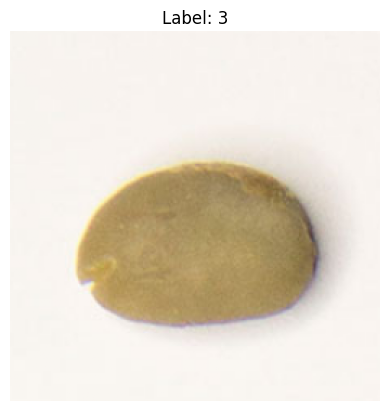

In [ ]:

# Display the image

idx_data = 10

bgr_data = np.transpose(test_dataset[idx_data]['pixel_values'], (2,1,0))
bgr_data1 = np.array(bgr_data)
print(bgr_data1.shape)

plt.imshow(bgr_data1[...,::-1])
plt.title(f"Label: {test_dataset[idx_data]['label']}")
plt.axis('off')  # Hide the axes for clarity
plt.show()

In [24]:
inference_prediction(test_dataset[idx_data]['pixel_values']) == test_dataset[idx_data]["label"]

tensor([False], device='cuda:0')

In [25]:
outputs = trainer.predict(test_dataset)


***** Running Prediction *****
  Num examples = 1920
  Batch size = 32
100%|██████████| 60/60 [00:14<00:00,  4.21it/s]


In [26]:
outputs.metrics

{'test_loss': 0.426061749458313,
 'test_runtime': 14.9201,
 'test_samples_per_second': 128.686,
 'test_steps_per_second': 4.021}

#### VISUALIZACIÓN DE LA MATRIZ DE CONFUSION

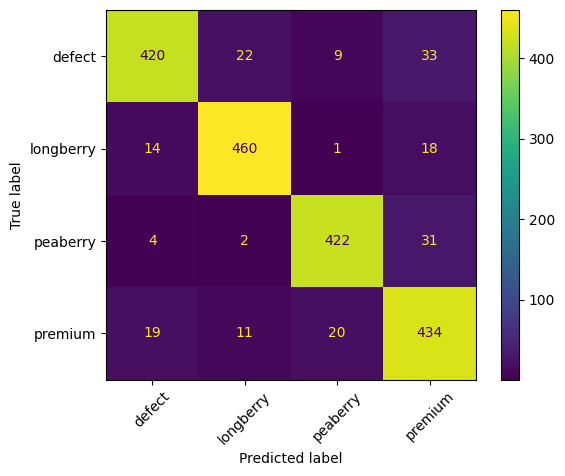

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_dataset.features['label'].names
cm = confusion_matrix(y_true, np.where(y_pred < 4, y_pred, -1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels )
disp.plot(xticks_rotation=45)
plt.show()

#### Conclusiones

- El uso del modelo MobileViT brinda resultados competitivos con otros modelos como CNN.

- Con un accuracy alcanzado de aproximadamente 90% es buena, considerando que es una prueba inicial con un modelo optimizado para su uso con recursos limitados.

- El uso del dataset "USK-COFFE" se basó en la cantidad de datos adecuados para un primer análisis y por su similitud ocn trabajos futuros.

- La selección del modelo se basa la novedad que representa combinar CNN y ViT para el uso optimizado en dispositivos móviles.


https://machinelearning.apple.com/research/vision-transformer